# Data Exploration, Pre-processing, Feature Selection, and Classification

## Part 1: Data Exploration and Pre-processing

### 1.1 Load the Dataset and Display its Characteristics

In [403]:
import pandas as pd

In [404]:
# read the dataset
iris_data=pd.read_csv('iris_data - original.csv')

In [405]:
# Display dataset characteristics
# Number of rows and columns
iris_data.shape

(150, 5)

In [406]:
# Data types
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [407]:
# First 5 rows
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.2 Check for Missing Values

In [409]:
print("Missing values in the dataset:\n", iris_data.isnull().sum())

Missing values in the dataset:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 1.3 Check for Duplicate Records

In [411]:
duplicate_rows = iris_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 1


In [412]:
#Remove duplicates
iris_data = iris_data.drop_duplicates()
print("Shape of the dataset after removing duplicates:", iris_data.shape)

Shape of the dataset after removing duplicates: (149, 5)


### 1.4 Summarize the Dataset’s Statistical Properties

In [414]:
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.843624     3.059732      3.748993     1.194631
std        0.830851     0.436342      1.767791     0.762622
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 1.5 Visualize the Data

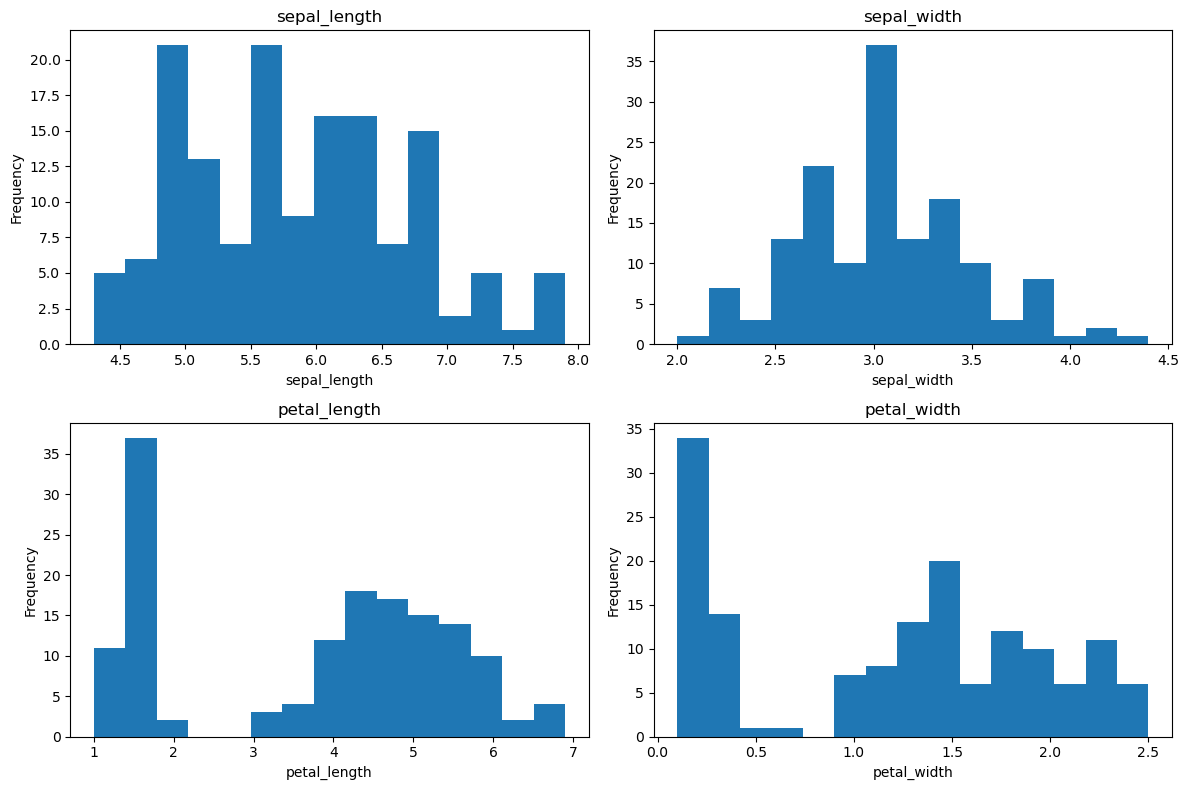

In [416]:
import matplotlib.pyplot as plt

axes= iris_data.hist(bins=15, figsize=(12, 8), grid=False)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())  # Set x-axis label to feature name
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### 1.6 Insight Paragraph

## Part 2:  Feature Selection

### 2.1 Variance Threshold Method

In [420]:
from sklearn.feature_selection import VarianceThreshold

X = iris_data.drop(columns='species')  
y = iris_data['species'] 

selector = VarianceThreshold(threshold=0.2)
X_variance_threshold = selector.fit_transform(X)

print("Features selected by Variance Threshold:", X.columns[selector.get_support()])

Features selected by Variance Threshold: Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


### 2.2 Recursive Feature Elimination (RFE)

In [422]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

rfe_selector = RFE(model, n_features_to_select=2)
rfe_selector.fit(X, y)

print("Features selected by RFE:", X.columns[rfe_selector.support_])

Features selected by RFE: Index(['petal_length', 'petal_width'], dtype='object')


### 2.3 Apply Selected Features to a Classifier

#### 2.3.1 Train a Classifier Using All Features

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Measure the training time
start_time = time.time() 
lr.fit(X_train, y_train)
end_time = time.time() 

# Calculate training time
training_time_all_features = end_time - start_time

# Predictions and accuracy
y_all_features = lr.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_all_features)

# Print accuracy and training time
print(f"Accuracy using all features: {accuracy_all_features:.4f}")
print(f"Training time with all features: {training_time_all_features:.4f} seconds")


Accuracy using all features: 1.0000
Training time with all features: 0.0469 seconds


#### 2.3.2 Train a Classifier Using Features Selected by Variance Threshold

In [427]:
# Split data using selected features by Variance Threshold
X_train_vt, X_test_vt, y_train, y_test = train_test_split(X_variance_threshold, y, test_size=0.3, random_state=42)

# Train Logistic Regression with selected features
lr = LogisticRegression(max_iter=1000)

# Measure the training time
start_time = time.time()  
lr.fit(X_train_vt, y_train)  
end_time = time.time()  

# Calculate training time
training_time_vt = end_time - start_time

# Predictions and accuracy
y_selected = lr.predict(X_test_vt)
accuracy_vt = accuracy_score(y_test, y_selected)

# Print accuracy and training time
print(f"Accuracy using Variance Threshold selected features: {accuracy_vt:.4f}")
print(f"Training time with Variance Threshold selected features: {training_time_vt:.4f} seconds")


Accuracy using Variance Threshold selected features: 1.0000
Training time with Variance Threshold selected features: 0.0275 seconds


#### 2.3.3 Train a Classifier Using Features Selected by RFE

In [429]:
# Split data using selected features by RFE
X_rfe = X.loc[:, rfe_selector.support_]
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# Train Logistic Regression with RFE selected features
lr = LogisticRegression(max_iter=1000)

# Measure the training time
start_time = time.time() 
lr.fit(X_train_rfe, y_train)
end_time = time.time() 

# Calculate training time
training_time_rfe = end_time - start_time

# Predictions and accuracy
y_pred_rfe = lr.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Print accuracy and training time
print(f"Accuracy using RFE selected features: {accuracy_rfe:.4f}")
print(f"Training time with RFE selected features: {training_time_rfe:.4f} seconds")

Accuracy using RFE selected features: 1.0000
Training time with RFE selected features: 0.0231 seconds


### 2.4 Insight Paragraph

## Part 3: Classification and Model Evaluation

### 3.1 Random Forest Classifier

Random Forest Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


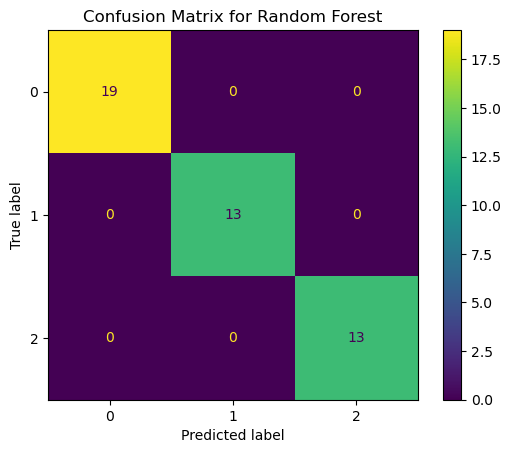

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Predicted probabilities for all classes
y_pred_proba_rf = rf.predict_proba(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')

# Print Evaluation Metrics
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

### 3.2 Naive Bayes Classifier

Naive Bayes Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


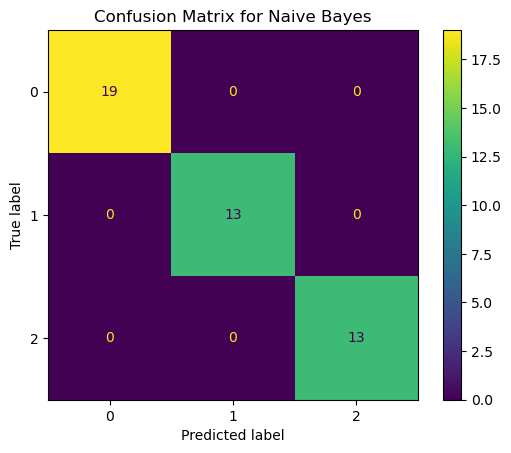

In [435]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Predicted probabilities for all classes
y_pred_proba_nb = nb.predict_proba(X_test)

# Evaluation Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')

# Print Evaluation Metrics
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"AUC-ROC: {roc_auc_nb:.4f}")

# Plot Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


### 3.3 Support Vector Machine (SVM) Classifier

SVM Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


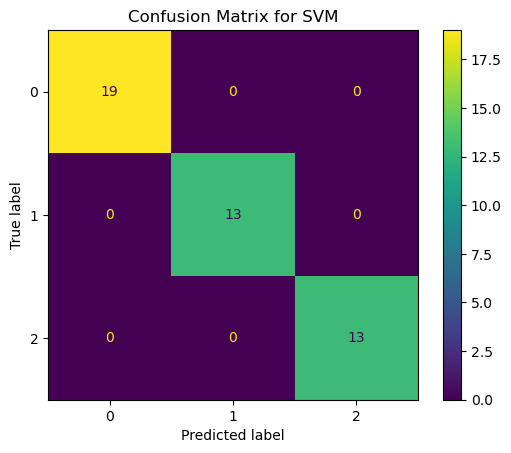

In [437]:
from sklearn.svm import SVC

# Train SVM Classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Predicted probabilities for all classes
y_pred_proba_svm = svm.predict_proba(X_test)

# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr')

# Print Evaluation Metrics
print("SVM Classifier:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"AUC-ROC: {roc_auc_svm:.4f}")

# Plot Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title("Confusion Matrix for SVM")
plt.show()


### 3.4 XGBoost Classifier

XGBoost Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


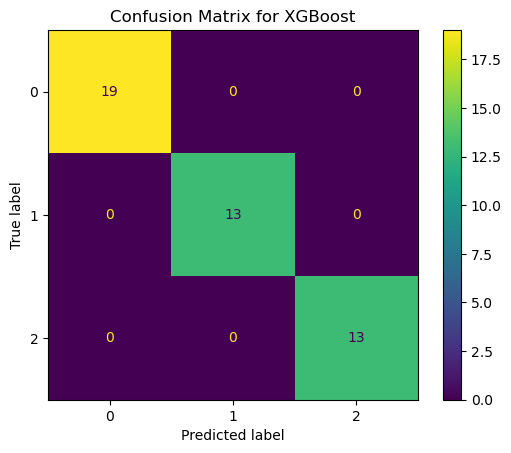

In [439]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Inverse transform predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

# Predicted probabilities for all classes
y_pred_proba_xgb = xgb.predict_proba(X_test)

# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
roc_auc_xgb = roc_auc_score(y_test_encoded, y_pred_proba_xgb, multi_class='ovr')

# Print Evaluation Metrics
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {roc_auc_xgb:.4f}")

# Plot Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()


### 3.5 Insight Paragraph